In [163]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data_source =  'drive/MyDrive/2021-General/maingames-analysis/data/Maingames_DS_dataset.csv'
df = pd.read_csv(data_source, index_col="Unnamed: 0")
df.head(3)

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Personal_Values_Facet_Cont_UniversalismTolerance,Temperament_Choleric,Self_Esteem_Cont_SEDiscrepancyResponsibility,Character_Facet_Cont_ArtisticInterests,Temperament_Sanguine,Character_Facet_Cont_Friendliness,Temperament_Diligent,Self_Esteem_Cont_SELevel,Character_Cont_Extraversion,Role_Director,Character_Facet_Cont_SelfConsciousness,Temperament_Energetic,Character_Facet_Cont_Adventurousness,Role_Craftsman,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Role_Toastmaster,Personal_Values_Facet_Cont_PowerDominance,Role_Marshal,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Personal_Values_Cont_SelfEnhancement,Self_Esteem_Cont_SEAspiration,Role_Supplier,Character_Facet_Cont_Activity,Temperament_Stable,Personal_Values_Facet_Cont_PowerResources,Self_Esteem_Cont_SEDiscrepancyAchievements,...,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Role_Advisor,Self_Esteem_Cont_SELevelOriginality,Role_Analyst,Personal_Values_Cont_SelfTranscendence,Personal_Values_Facet_Cont_Achievement,Character_Facet_Cont_Trust,Temperament_Unstable,Character_Cont_Agreeableness,Role_Inventor,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Role_Designer,Role_Deputy,Personal_Values_Cont_OpennessToChange,PaidStarPerWatchedHour.1,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Role_Strategist,Role_Inspector,Self_Esteem_Cont_SEAspirationAppearance,Character_Facet_Cont_SelfDiscipline,Self_Esteem_Cont_SEDiscrepancyIntelligence,Role_Companion,Character_Facet_Cont_Cooperation,Role_Commander,Role_Activist,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,0.471456,0.522711,0.337836,0.554134,0.0,0.496688,0.504059,0.25,0.494384,0.125,0.462912,0.474577,0.679339,0.471482,0.125,0.544957,0.453882,0.679427,0.721495,0.530887,0.356304,0.620860,0.605858,0.473335,0.303076,0.881936,0.509514,0.691145,0.750,0.317289,0.544263,...,0.353928,0.477637,0.577660,0.728769,0.627180,0.275763,0.322608,0.45008,0.500,0.467756,0.705475,0.543155,0.244511,0.686694,0.554406,0.533952,0.516859,0.303909,0.004113,0.553544,0.771031,0.783868,0.670467,0.648751,0.518061,0.473907,0.541372,0.352032,0.449807,0.514417,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,0.493514,0.348513,0.408481,0.610872,0.0,0.557879,0.577758,0.50,0.468738,0.250,0.386516,0.445183,0.381432,0.352964,0.000,0.604113,0.325222,0.743407,0.534425,0.349459,0.341675,0.486200,0.490160,0.579283,0.298714,0.860851,0.098237,0.554197,0.625,0.317427,0.583342,...,0.425649,0.456436,0.239550,0.771001,0.403616,0.264248,0.333644,0.50451,0.125,0.225692,0.718745,0.460678,0.276966,0.627786,0.511837,0.488030,0.263292,0.309062,0.002855,0.352700,0.462166,0.549318,0.397981,0.690168,0.442303,0.482889,0.230455,0.401419,0.277163,0.286003,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,0.472405,0.376854,0.518602,0.579433,0.5,0.395199,0.594752,0.00,0.413872,0.500,0.568077,0.322573,0.305979,0.750039,0.000,0.657773,0.784232,0.555626,0.568014,0.555618,0.362791,0.177483,0.189999,0.510046,0.231113,0.805830,0.360728,0.546

# Data clearning

In [169]:
# Drop NA value (value = '-')
df = df[df.Game != '-']
df = df[df.Game != 'No MLBB Video']
# Merge same game name
 # Arena of Valor
df['Game'] = df['Game'].replace(['Garena Liên Quân Mobile','Liên Quân Mobile'],'Arena of Valor')
 # Age of Empires
df['Game'] = df['Game'].replace(['Agge of Empires'],'Age of Empires')
 # Audition online
df['Game'] = df['Game'].replace(['Audition'],'Audition Online')
df['Game'] = df['Game'].replace(['Call of Duty: Mobile VN'],'Call of Duty: Mobile')
df['Total Follower'] = df['Total Follower'].replace(['250,98'],25098)

# change datatype
df['Total Follower'] = pd.to_numeric(df['Total Follower'])

# Other
df['PaidStarPerWatchedHourPerFollower'] = df['PaidStarPerWatchedHour']/df['Total Follower']

In [181]:
# # Show all games
# for game in df.groupby('Game').groups.keys():
#   print(game)
# df.groupby('Game').groups.keys()
# df.groupby('Game').count().iloc[:,0].shape

dict_keys(['8 Ball Pool', 'Age of Empires', 'Apex Legends', 'Arena of Valor', "Assassin's Creed Odyssey", 'Audition Online', 'Auto Chess', 'Blade & Soul', 'CABAL ONLINE', 'Call of Duty: Mobile', 'Call of Duty: Warzone', 'Coin Master', 'Counter-Strike: Global Offensive', 'Crazy Kart', 'Crossfire', 'Days Gone', 'Dead by Daylight', 'Dota 2', 'EA Sports UFC 3', 'Euro Truck Simulator 2', 'FIFA Online 4', "Five Nights at Freddy's 2", 'Free Fire - Battlegrounds', 'God of War', 'Grand Theft Auto V', 'Green Hell', 'Identity V', 'J-League Jikkyou Winning Eleven', 'League of Legends', 'League of Legends: Wild Rift', 'Little Big Snake', 'MLBB', 'MU Online', 'Minecraft', 'Moon of Madness', 'MotoGP', 'NBA 2K20', 'Naruto Shippuden: Ultimate Ninja Storm 4', 'Ngọc Rồng Online', 'PUBG', 'Persona 5 Royal', 'Point Blank Indonesia', 'RULES OF SURVIVAL', 'Ragnarok M: Eternal Love', 'Roblox', 'Sea of Thieves', 'Star Wars Jedi: Fallen Order', 'Teamfight Tactics', 'The Last of Us', 'The Last of Us: Part II', '

In [ ]:
# Generate game count
df_game_count = df.groupby('Game').count().sort_values('Country', ascending=False).iloc[:, 0:1].rename(columns={'Country':'Count'})
# df_game_count.head(10)

# Check Per Followers

In [ ]:
cols = ['Total Follower','PaidStarPerWatchedHour'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df[condition]
filtered_df.shape

(491, 127)

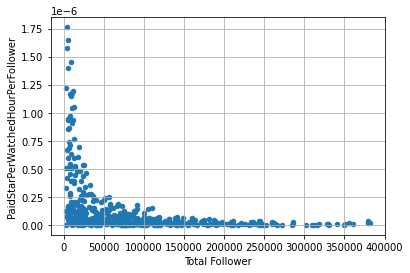

In [ ]:
filtered_df[['Total Follower', 'PaidStarPerWatchedHourPerFollower']].plot(x='Total Follower', y='PaidStarPerWatchedHourPerFollower', grid=True, kind='scatter')

In [ ]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PaidStarPerWatchedHourPerFollower']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
condition = (df[cols]>Q3).any(axis=1)
df_filtered_by_PSPWPF = df[condition]

In [ ]:
c = df_filtered_by_PSPWPF.corr()
c['PSPW_abs'] = c['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
c_rank = c[['PaidStarPerWatchedHour', 'PSPW_abs']].sort_values('PSPW_abs', ascending=False)[c['PSPW_abs'] > c['PSPW_abs'].mean()]
c_rank = c_rank.iloc[3:]
c_rank.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PaidStarPerWatchedHour,PSPW_abs
Role_Philanthropist,-0.282005,0.282005
Role_Manager,-0.254636,0.254636
Character_Cont_Conscientiousness,-0.245829,0.245829
Character_Facet_Cont_AchievementStriving,-0.245191,0.245191
Role_Marshal,-0.237801,0.237801
Personal_Values_Facet_Cont_Hedonism,0.236380,0.236380
Character_Cont_Openness,-0.230269,0.230269
Role_Commander,-0.228296,0.228296
Character_Facet_Cont_Morality,0.221398,0.221398
Personal_Values_Facet_Cont_ConformityRules,-0.215039,0.215039


In [ ]:
import nltk
from wordcloud import WordCloud
from collections import Counter

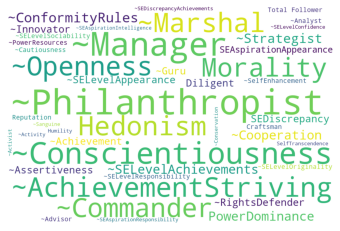

In [ ]:
dictionary = {}
for idx in c_rank.index:
  key = idx.split('_')[-1]
  if c_rank.loc[idx,'PaidStarPerWatchedHour']<0:
    key = '~'+key
  dictionary[key] = c_rank.loc[idx,'PSPW_abs']*1000
dictionary
wc = WordCloud(background_color='white',
                         margin=2, 
                         max_words=200, 
                         width=1080, height=720, 
                         relative_scaling=0.5
                         )
wc.generate_from_frequencies(frequencies=dictionary)
plt.axis('off')
plt.imshow(wc)

# Correlation Matrix

## General Data

In [192]:
corr_matrix = df.corr()
corr_matrix['PSPW_abs'] = corr_matrix['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
corr_core = corr_matrix[['PaidStarPerWatchedHour', 'PSPW_abs']]

In [195]:
corr_core.sort_values('PSPW_abs', ascending=False).head(10)

,PaidStarPerWatchedHour,PSPW_abs
PaidStarPerWatchedHour,1.000000,1.000000
PaidStarPerWatchedHour.1,1.000000,1.000000
PaidStarPerWatchedHourPerFollower,0.945065,0.945065
Personal_Values_Facet_Cont_Hedonism,0.142095,0.142095
Role_Philanthropist,-0.140508,0.140508
Personal_Values_Facet_Cont_ConformityRules,-0.140314,0.140314
Character_Facet_Cont_AchievementStriving,-0.134136,0.134136
Role_Manager,-0.130683,0.130683
Character_Cont_Conscientiousness,-0.126654,0.126654
Role_Marshal,-0.116596,0.116596


## Divide into several group: Country, Game, Genger

In [220]:
# Distribution of VN, PUBG, Male
vpm = df.loc[df['Game'] == 'PUBG'].loc[df['Country'] == 'VN'].loc[df['Gender'] == 'Male']
test_corr = vpm.corr()
test_corr['PSPW_abs'] = test_corr['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
test_corr = test_corr[['PaidStarPerWatchedHour', 'PSPW_abs']]
test_corr

,PaidStarPerWatchedHour,PSPW_abs
Total Follower,-0.195180,0.195180
Broadcast Hours,0.220304,0.220304
PaidStarPerWatchedHour,1.000000,1.000000
Character_Facet_Cont_Rigidity,-0.099999,0.099999
Character_Facet_Cont_AchievementStriving,0.079238,0.079238
...,...,...
Role_Curator,0.174295,0.174295
Personal_Values_Cont_Conservation,0.126991,0.126991
Self_Esteem_Cont_SELevelIntelligence,0.114209,0.114209
Temperament_Centric,-0.020632,0.020632


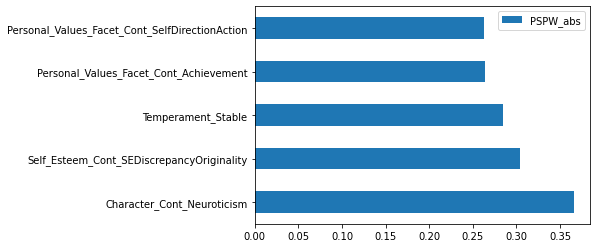

In [221]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PSPW_abs']
Q3 = test_corr[cols].quantile(0.75)
condition = (test_corr[cols]>Q3).any(axis=1)
test_corr = test_corr[condition]
test_corr = test_corr.sort_values('PSPW_abs',ascending= False).iloc[3:,1:]
test_corr
test_corr.head(5).plot(kind='barh')

In [ ]:
# Distribution of VN, PUBG, Female
vpf = df.loc[df['Game'] == 'PUBG'].loc[df['Country'] == 'VN'].loc[df['Gender'] == 'Female']
test_corr_f = vpf.corr()
test_corr_f['PSPW_abs'] = test_corr_f['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
test_corr_f = test_corr_f[['PaidStarPerWatchedHour', 'PSPW_abs']]
test_corr_f

,PaidStarPerWatchedHour,PSPW_abs
Total Follower,-0.160742,0.160742
Broadcast Hours,0.074013,0.074013
PaidStarPerWatchedHour,1.000000,1.000000
Character_Facet_Cont_Rigidity,-0.387625,0.387625
Character_Facet_Cont_AchievementStriving,0.008814,0.008814
...,...,...
Role_Curator,-0.200469,0.200469
Personal_Values_Cont_Conservation,-0.347054,0.347054
Self_Esteem_Cont_SELevelIntelligence,0.367693,0.367693
Temperament_Centric,0.172117,0.172117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


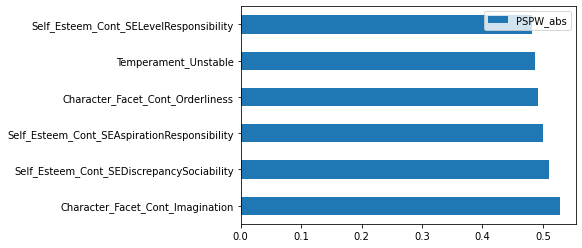

In [ ]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PSPW_abs']
Q3 = test_corr_f[cols].quantile(0.75)
condition = (test_corr_f[cols]>Q3).any(axis=1)
test_corr_f = test_corr_f[condition]
test_corr_f = test_corr_f.sort_values('PSPW_abs',ascending= False)[test_corr_f['PSPW_abs'] > test_corr_f['PSPW_abs'].mean()].iloc[3:,1:]
test_corr_f.plot(kind='barh')

Country
ID    0.000022
PH    0.000202
VN    0.000025
Name: PaidStarPerWatchedHour, dtype: float64


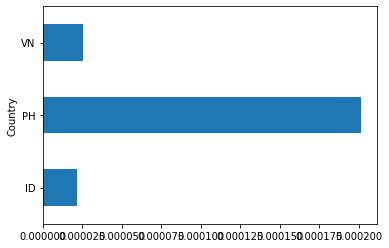

In [187]:
# print(df.groupby('Country').mean()['PaidStarPerWatchedHour'])
print(df.groupby('Country').mean()['PaidStarPerWatchedHour']/df.groupby('Country').count()['PaidStarPerWatchedHour'])
(df.groupby('Country').mean()['PaidStarPerWatchedHour']/df.groupby('Country').count()['PaidStarPerWatchedHour']).plot(kind='barh')

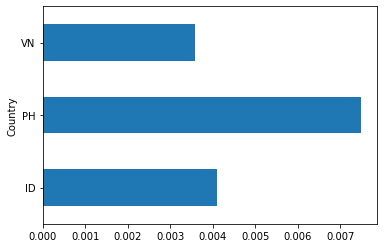

In [ ]:
df[df['Gender'] == 'Male'].groupby('Country').mean()['PaidStarPerWatchedHour'].plot(kind='barh')

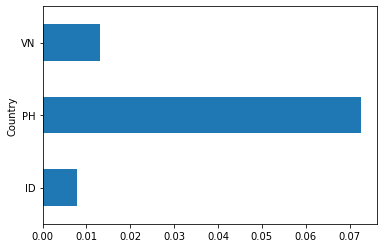

In [ ]:
df[df['Gender'] == 'Female'].groupby('Country').mean()['PaidStarPerWatchedHour'].plot(kind='barh')

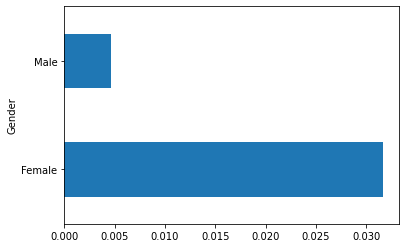

In [ ]:
df.groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')

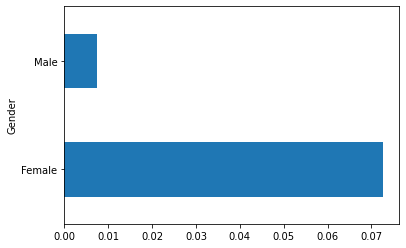

In [ ]:
df[df['Country'] == 'PH'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')

Gender
Female    0.000183
Male      0.000010
Name: PaidStarPerWatchedHour, dtype: float64


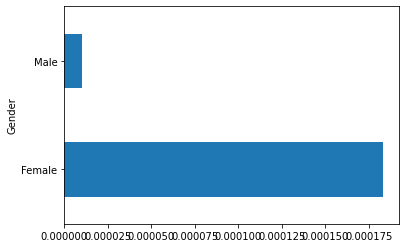

In [190]:
print(df.groupby('Gender').mean()['PaidStarPerWatchedHour']/df.groupby('Gender').count()['PaidStarPerWatchedHour'])
(df.groupby('Gender').mean()['PaidStarPerWatchedHour']/df.groupby('Gender').count()['PaidStarPerWatchedHour']).plot(kind='barh')

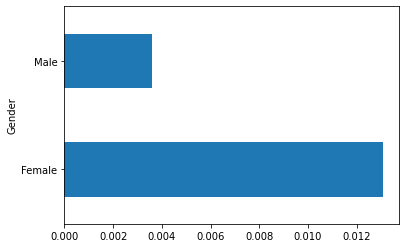

In [ ]:
df[df['Country'] == 'VN'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')

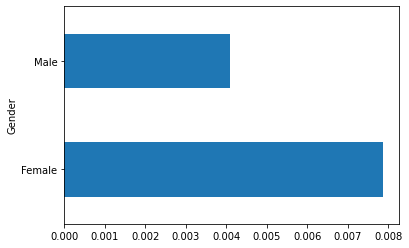

In [ ]:
df[df['Country'] == 'ID'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')